# Movie Recommender - Data Exploration

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
path = "../cleaned_data/"
movies = pd.read_csv(f"{path}cl_movies.csv")
links = pd.read_csv(f"{path}cl_links.csv")
ratings = pd.read_csv(f"{path}cl_ratings.csv")
normed_ratings = pd.read_csv(f"{path}cl_normed_ratings.csv")
tags = pd.read_csv(f"{path}cl_tags.csv")

In [28]:
movies["title"].sample(10)

6208                                        $2 $1 
3212                          Twelve O'Clock High 
9585    On the Trail of the Bremen Town Musicians 
7482                              All Good Things 
774                                         $2 $1 
6409                        It's a Boy Girl Thing 
4355                               Pokémon Heroes 
2411                             Five Easy Pieces 
4793                           My Flesh and Blood 
6392                                        49 Up 
Name: title, dtype: object

In [22]:
links.head()

,movieId,tmdbId
0,1,862
1,2,8844
2,3,15602
3,4,31357
4,5,11862


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

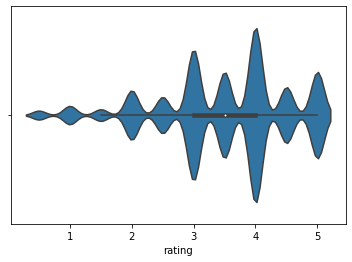

In [24]:

sns.violinplot(ratings["rating"], title="Hist of Movie Ratings")


<AxesSubplot:xlabel='rating'>

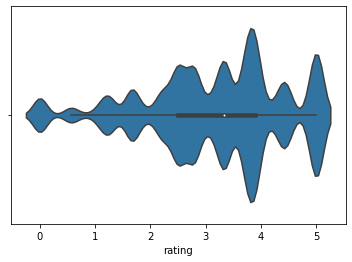

In [25]:
sns.violinplot(data=normed_ratings, x="rating")


In [26]:
sns.scatterplot(data=ratings, x="timestamp", hue="movie_id")

ValueError: Could not interpret value `movie_id` for parameter `hue`

In [ ]:
users_per_tag = (
    tags
        .groupby("tag")
        .count()
        .query("userId > 1")
        .sort_values("userId", ascending=False)

)
users_per_tag

,userId,movieId,timestamp
tag,,,
In Netflix queue,131,131,131
atmospheric,36,36,36
superhero,24,24,24
thought-provoking,24,24,24
funny,23,23,23
...,...,...,...
Visually stunning,2,2,2
Tom Hardy,2,2,2
Tom Clancy,2,2,2


In [ ]:
tags_per_movie = (
    tags
        .groupby('movieId')
        ["tag"]
        .transform(lambda x: "|".join(x))
)
tags_per_movie

movies["tags"] = tags_per_movie

movies

,movieId,title,genres,year,tags
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,funny|Highly quotable|will ferrell|comedy|funn...
1,2,Jumanji,Adventure|Children|Fantasy,1995,funny|Highly quotable|will ferrell|comedy|funn...
2,3,Grumpier Old Men,Comedy|Romance,1995,funny|Highly quotable|will ferrell|comedy|funn...
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,Boxing story|MMA|Tom Hardy
4,5,Father of the Bride Part II,Comedy,1995,Boxing story|MMA|Tom Hardy
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,NaN
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,NaN
9739,193585,Flint,Drama,2017,NaN
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,NaN


<AxesSubplot:xlabel='year', ylabel='rating'>

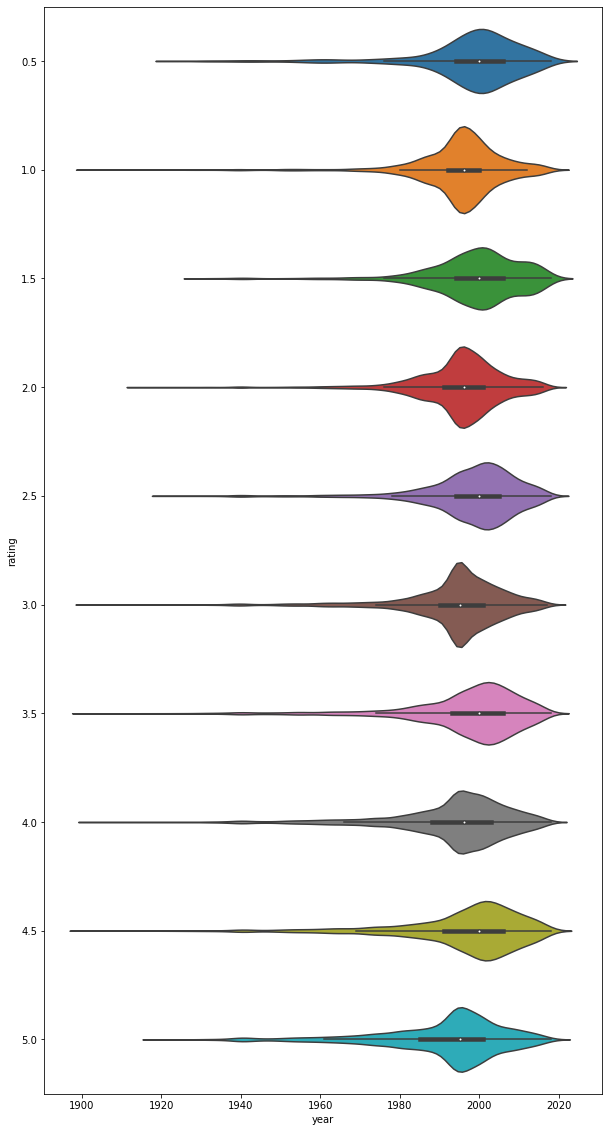

In [ ]:
final = movies.merge(ratings)

fig, ax = plt.subplots(figsize=(10,20))
sns.violinplot(data=final.query("year != 0"), x="year",y="rating", orient="horizontal", ax=ax)


<AxesSubplot:xlabel='year', ylabel='title'>

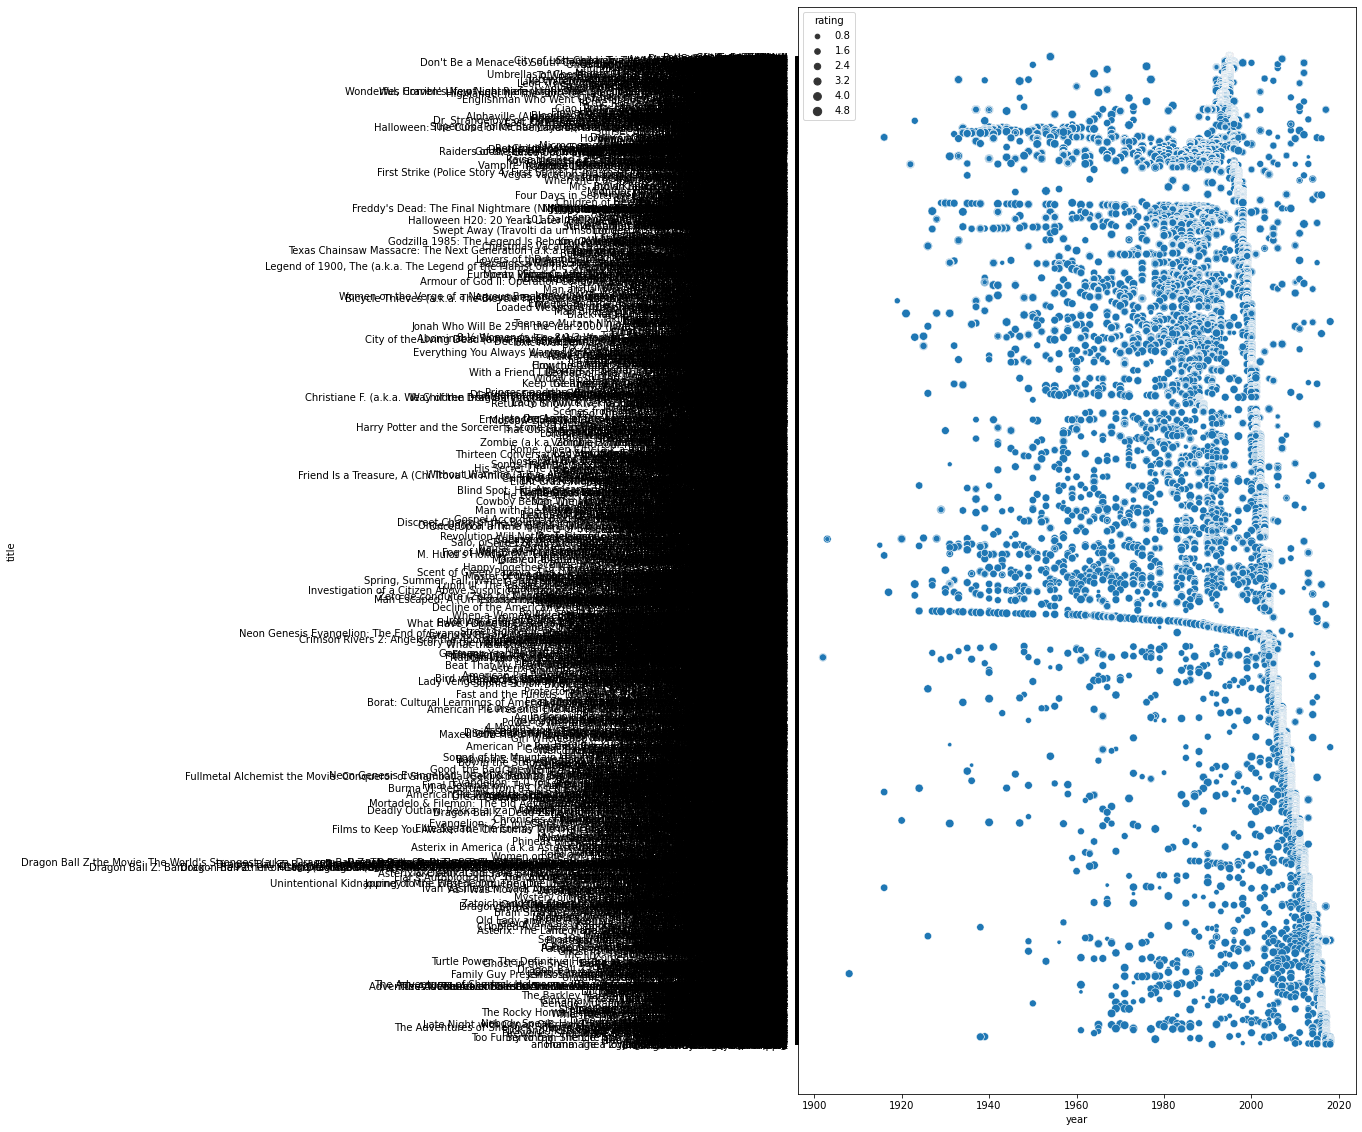

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))


In [ ]:
top20_movies = (
    movies
        .merge(ratings)
        .groupby("movieId")
        .agg({"userId": "count", "rating": "mean"})
        .query("userId > 10")
        .sort_values("rating", ascending=False)
        .head(20)
        .reset_index()
        .merge(movies)
)
top20_movies

,movieId,userId,rating,title,genres,year,tags
0,1041,11,4.590909,Secrets & Lies,Drama,1996,mindfuck|Mystery|plot twist|psychological|susp...
1,3451,11,4.545455,Guess Who's Coming to Dinner,Drama,1967,superhero|atmospheric|comics|father-son relati...
2,1178,12,4.541667,Paths of Glory,Drama|War,1957,hilarious|Steve Carell|Will Ferrell|stupid|awe...
3,1104,20,4.475000,"Streetcar Named Desire, A",Drama,1951,asylum|based on a true story|Brittany Murphy|M...
4,2360,12,4.458333,"Celebration, The (Festen)",Drama,1998,In Netflix queue
5,1217,15,4.433333,Ran,Drama|War,1985,black comedy|Brad Pitt|Christoph Waltz|Quentin...
6,318,317,4.429022,"Shawshank Redemption, The",Crime|Drama,1994,anti-intellectual|bad writing|dystopia|new soc...
7,951,14,4.392857,His Girl Friday,Comedy|Romance,1940,moving|thought-provoking|Holocaust|based on a ...
8,922,27,4.333333,Sunset Blvd. (a.k.a. Sunset Boulevard),Drama|Film-Noir|Romance,1950,addiction|heroin|Leonardo DiCaprio|Mark Wahlberg
9,3468,18,4.333333,"Hustler, The",Drama,1961,claymation|creativity|dystopia|free to downloa...


<AxesSubplot:>

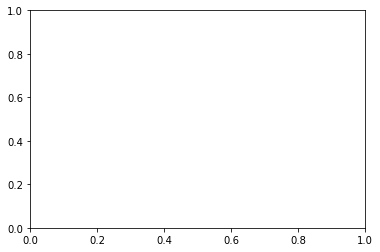

In [ ]:

sns.scatterplot(data=top20_movies, x="year", y="title", size="rating")